# Heart Failure Prediction:

**Group Members: Yifeng Lin, Yuan Zheng and Ziyang Guo**

## Abstract:

This project is about using different machine learning models to predict the heart failure based on other biological informations to check which model has the best performance.The model we select out can be a good tool for people who want to predict their possibility to get cardiovascular diseases. The dataset is scourced from Kaggle.com. It includes 918 observations and contains 11 features that can be used to predict a possible heart disease. Due to there are more and more people have regular physical examinzations but the number of people suffering from CVDs is still increasing year by year,so that we come up with 2 research questions based on the data we have now. Q1: What biological attributes can help us to construct machine learning models that can predict whether we have cardiovascular disease or not? Q2:Which model is the best model to predict whether we have cardiovascular disease or not? Our response variable is 'HeartDisease'.

## Introduction:

Cardiovascular diseases (CVDs) are the top 1 cause of death globally. There are about 659,000 people in the United States who die from cardiovascular disease each year. So, we want to find data that can create a model to predict cardiovascular diseases based on various other symptoms and biological info.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Data Set Attribute Description

    1.Age: age of the patient [years]
    2.Sex: sex of the patient [M: Male, F: Female]
    3.ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    4.RestingBP: resting blood pressure [mm Hg]
    5.Cholesterol: serum cholesterol [mm/dl]
    6.FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    7.RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    9.ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    10.Oldpeak: oldpeak = ST [Numeric value measured in depression]
    11.ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    12.HeartDisease: output class [1: heart disease, 0: Normal]

## Exploratory Data Analysis 

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# load data from github
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see the data types are good to use. Don't need any further transformation.

In [4]:
# check unique for each columns
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [5]:
# check for duplicate use cases
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

We also checked the duplicated data in the dataset. We can see there isn't any duplicated data.

In [6]:
df_cat = data[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]
df_num = data[['Age','RestingBP','MaxHR','Cholesterol','Oldpeak']]

In [7]:
# turn the name of each columns into list
column_cat=df_cat.columns.to_list()
column_num=df_num.columns.to_list()

**Categorical Variable**

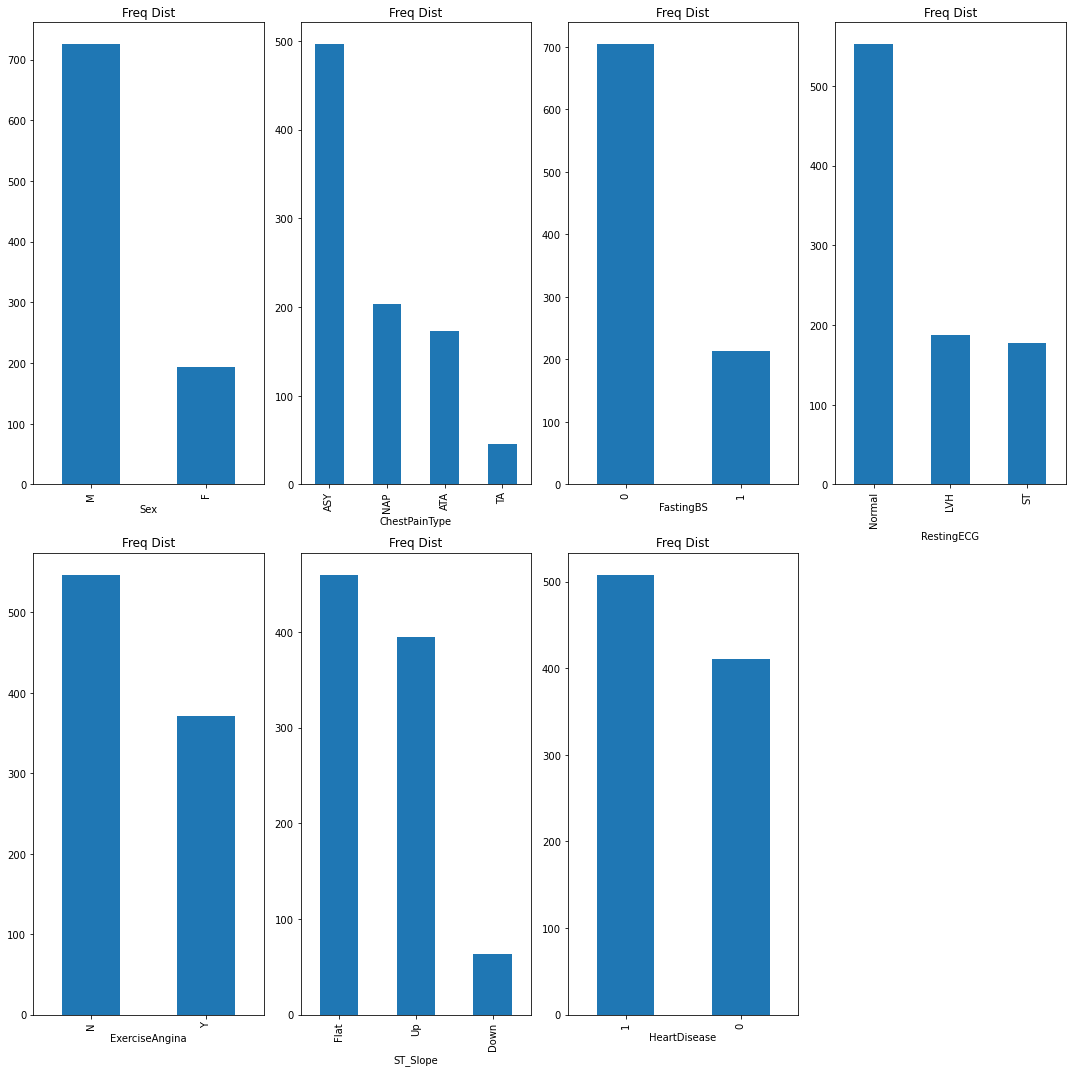

In [8]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(7):
    plt.subplot(2,4,i+1)
    df_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

According to the barplot of each categorical attribute:  
**Sex:** M = Male, F = Female. M:F nearly equal to 8:2.  
**ChestPainType:** There 4 types of chest pain type. The ASY are the most common type in the dataset.  
**FastingBS:** '0':'1' nearly equal to 7:3. It means most people have normal fasting BS.  
**RestingECG:** There 3 types of resting ECG. Most of people has normal resting ECG. The number of people who have LVH type of resting ECG are nearly equal to the number of people who have ST type of resting ECG.  
**ExerciseAngina:** The number of people don't have exercise-indeued angina is more than the number of people who do.  
**ST_Slope:** There are 3 types of ST_Slope. There are more people who have flat or up ST_Slope.  
**HeartDisease:** The response variable. The number of people who have cardiovascular diseases are more than the number of people who don't.  
Due to 'ST_Slop', 'ExerciseAngina', 'RestingECG', 'ChestPainType', and 'Sex' are nominal categorical variables, so we will transiform them into dummy variables in below data preparation.

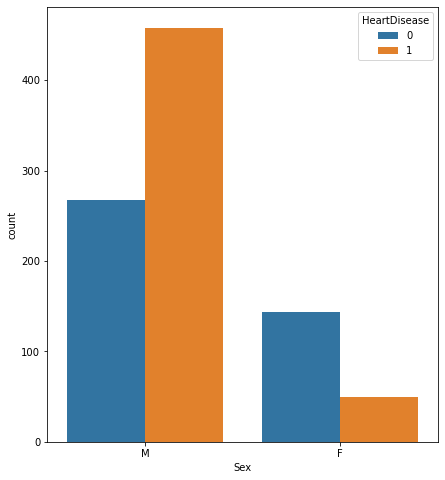

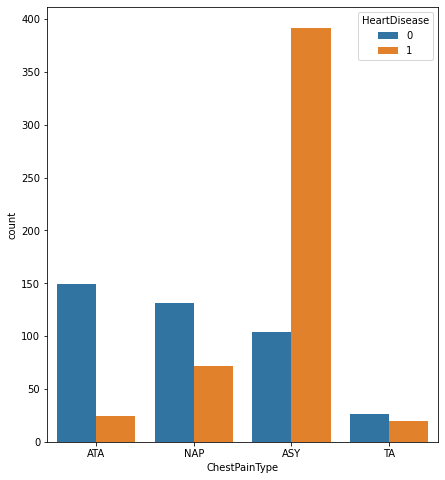

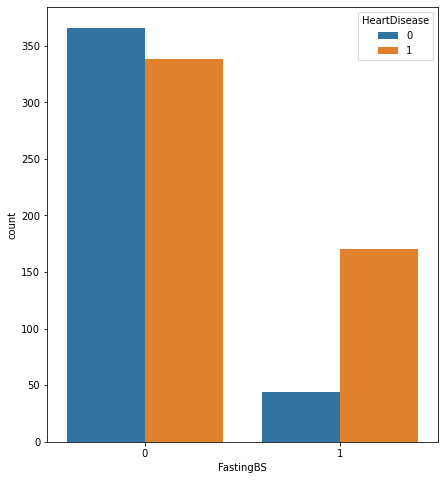

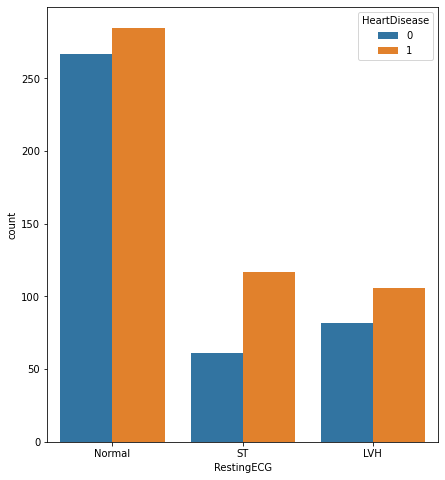

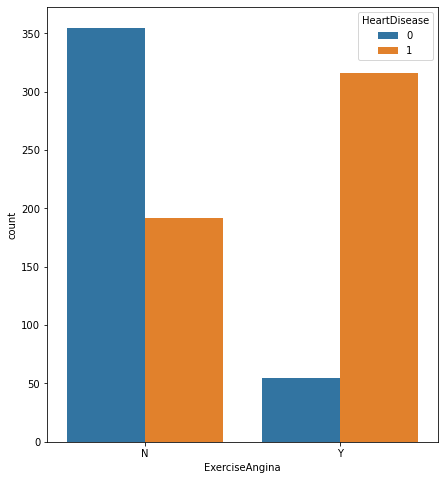

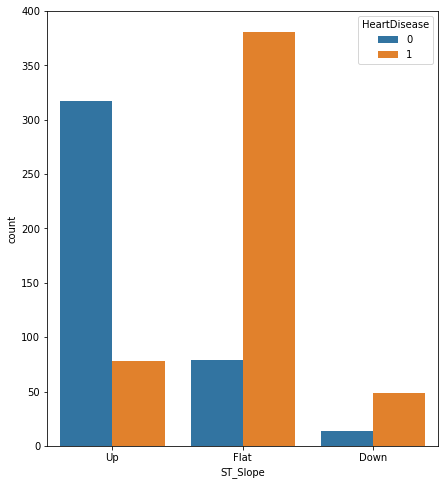

In [9]:
# show the relationship between categorical variables and the responsible variable 'HeartDisease'
for col in column_cat[:6]:
    plt.figure(figsize=(7,8))
    sns.countplot(x=col,hue=data['HeartDisease'],data=data)

According to the countplots, the 'Fasting BS' obviously has less '1', and the 'HeartDisease' has nearly equal to 0 and 1 when 'Fasting BS' equals to 0, so that may mean the 'Fasting BS' may not be any key indicator that can lead to cardiovascular diseases. The Male are more likely to have cardiovascular diseases than females. The ASY chest pain type is more likely to lead to cardiovascular diseases. Three 'Resing ECG' types don't have a significantly different impact on leading cardiovascular diseases. People who have exercise-induced angina are more likely to have cardiovascular diseases. The Flat and Down 'ST_Slope' ARE more likely leading to cardiovascular diseases.

**Numerical Variable**

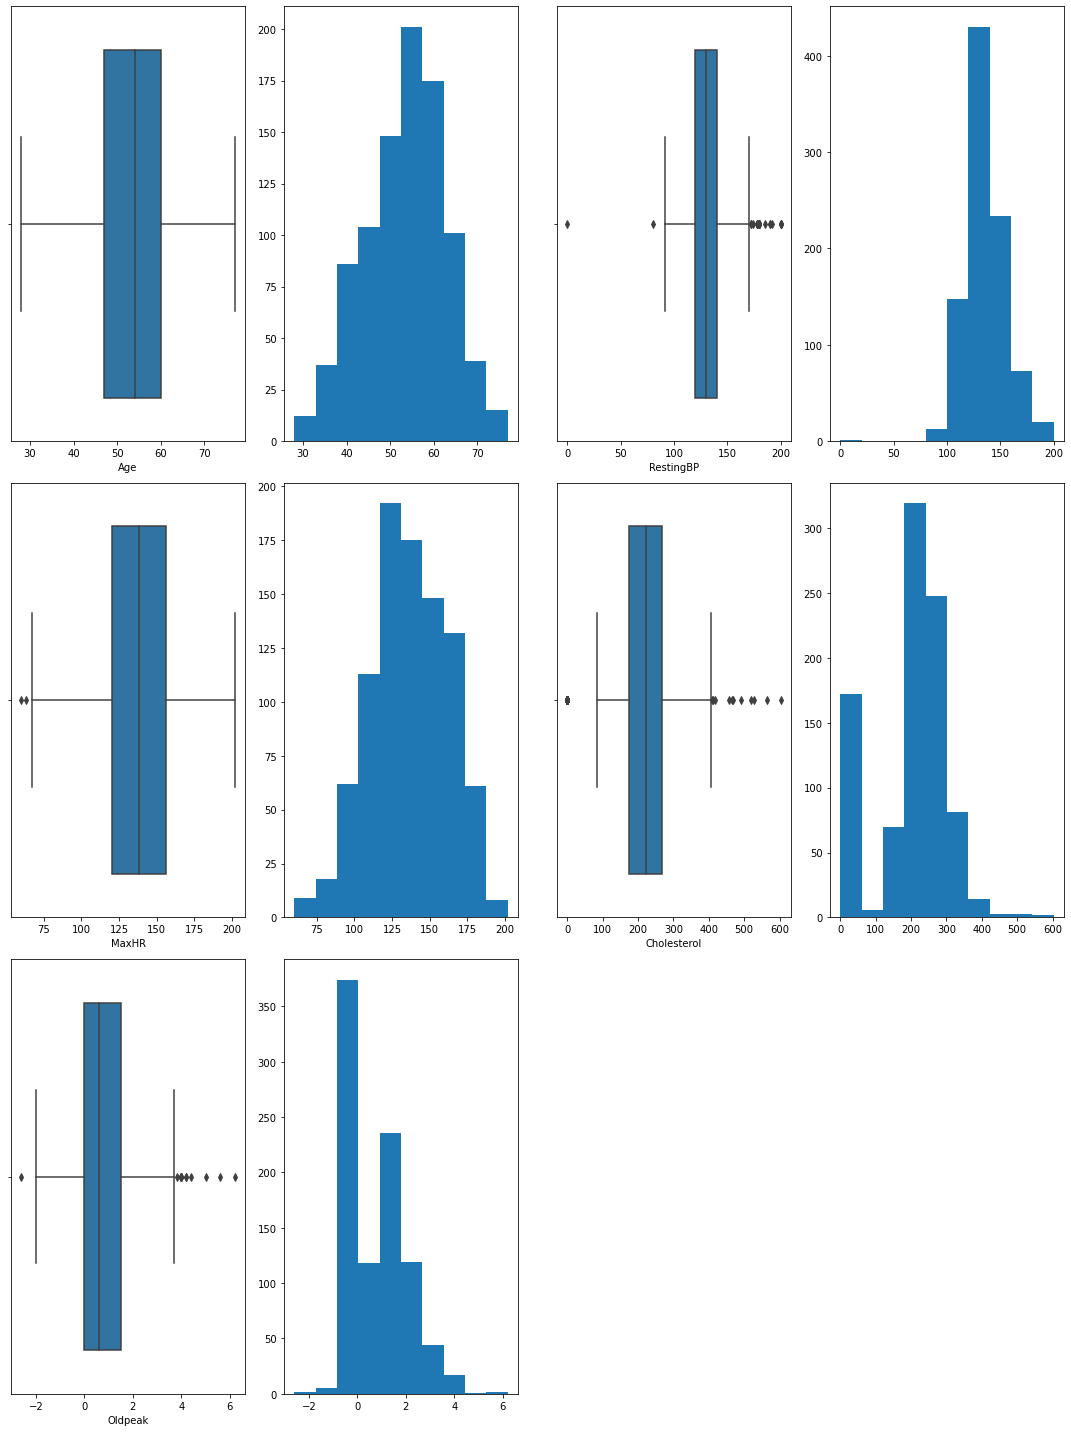

In [10]:
# show histograms and boxplots of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(5):
    n=2*i
    plt.subplot(3,4,n+1)
    sns.boxplot(df_num[column_num[i]])
    plt.subplot(3,4,n+2)
    plt.hist(df_num[column_num[i]])
    
plt.tight_layout()

According to the boxplots and histograms:  
**Age:** Range from 28-77.  
**Resting BP:** Resting blood pressure.  
**MaxHR:** Maximum heart rate. High MaxHR may be more likely leading to cardiovascular diseases.  
**Cholesterol:** serum cholesterol. High serum cholesterol may be more likely to lead to cardiovascular diseases.  
**Oldpeak:** Depression level.  
we can see that every numerical attribute except for Cholesterol are nearly normally distributed. The 'RestingBP', 'MaxHR', 'Cholesterol', and 'Oldpeak' have some outliers. 

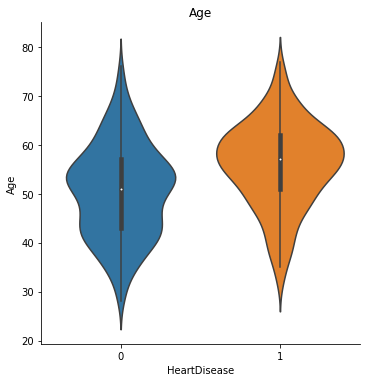

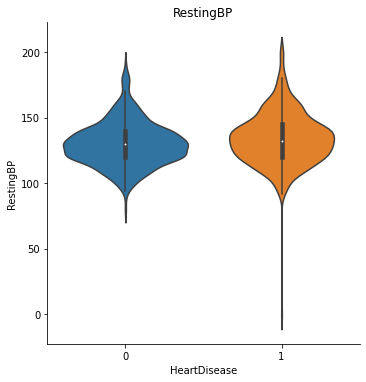

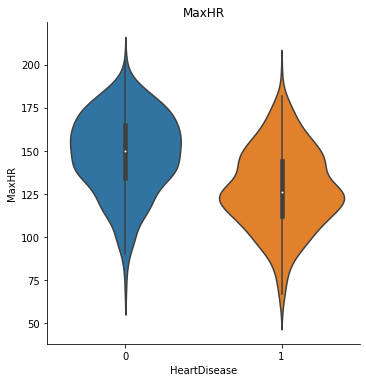

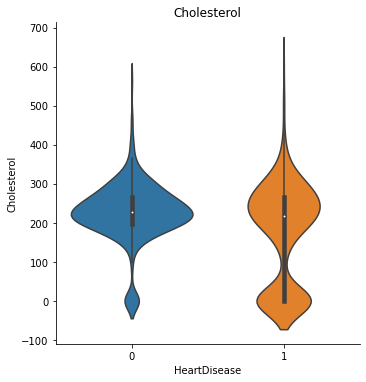

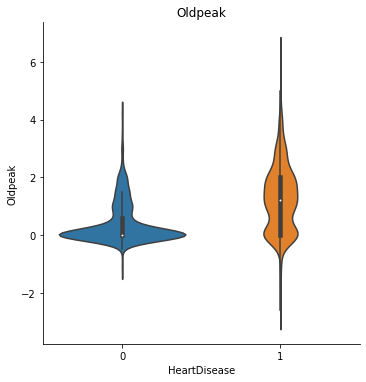

In [11]:
# show the relationship between numberical variables and the response variable
%matplotlib inline
for i in range(5):  
    ax=sns.catplot(x=data['HeartDisease'],y=column_num[i],kind="violin",data=data)
    plt.title(column_num[i])
    plt.show()

According to the above violin chart, we can get the relationship between numerical variables and the response variable 'heart disease'
- Age: It seems like the average age of people with heart disease is 5 years older than the average age of people without heart disease.
- RestingBP: There is no special difference between the two groups in resting blood pressure. Only seems like some patients with heart disease might have lower Resting BP.
- MaxHR: People with lower Max heart rateS might get heart disease. Because the average MaxHR of patients is 25 lower than the average  MaxHR of people who have no heart disease.
- Cholesterol: They have the same mean value which is about 250.
- Oldpeak: It looks like the average Oldpeak of people with heart disease is more than the average Oldpeak of people without heart disease.

Above all, we may prefer to use 'age', 'MaxHR' and 'Oldpeak' as our explanatory variable.

In [12]:
df_num.describe()

,Age,RestingBP,MaxHR,Cholesterol,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,136.809368,198.799564,0.887364
std,9.432617,18.514154,25.460334,109.384145,1.066570
min,28.000000,0.000000,60.000000,0.000000,-2.600000
25%,47.000000,120.000000,120.000000,173.250000,0.000000
50%,54.000000,130.000000,138.000000,223.000000,0.600000
75%,60.000000,140.000000,156.000000,267.000000,1.500000
max,77.000000,200.000000,202.000000,603.000000,6.200000


In [13]:
df_num.corr()

,Age,RestingBP,MaxHR,Cholesterol,Oldpeak
Age,1.000000,0.254399,-0.382045,-0.095282,0.258612
RestingBP,0.254399,1.000000,-0.112135,0.100893,0.164803
MaxHR,-0.382045,-0.112135,1.000000,0.235792,-0.160691
Cholesterol,-0.095282,0.100893,0.235792,1.000000,0.050148
Oldpeak,0.258612,0.164803,-0.160691,0.050148,1.000000


According to the violin plot and the correlation calculation:
we can see that people between the ages of 50-70 are more likely to have cardiovascular diseases, and the 'RestingBP' may not be a key indicator that leads to cardiovascular diseases. These attributes have a low correlation with each other.

## Data Preparation:

According to the result of EDA, we decide to use standardization for numerical variables and use OneHotEncoder to turn nominal categorical attributes into dummy variables.

In [14]:
# load standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['Age','RestingBP','MaxHR','Cholesterol','Oldpeak']])
df_num1 = pd.DataFrame(scaler.transform(data[['Age','RestingBP','MaxHR','Cholesterol','Oldpeak']]),columns = ['Age','RestingBP','MaxHR','Cholesterol','Oldpeak'])
df_num1

,Age,RestingBP,MaxHR,Cholesterol,Oldpeak
0,-1.433140,0.410909,1.382928,0.825070,-0.832432
1,-0.478484,1.491752,0.754157,-0.171961,0.105664
2,-1.751359,-0.129513,-1.525138,0.770188,-0.832432
3,-0.584556,0.302825,-1.132156,0.139040,0.574711
4,0.051881,0.951331,-0.581981,-0.034755,-0.832432
...,...,...,...,...,...
913,-0.902775,-1.210356,-0.188999,0.596393,0.293283
914,1.536902,0.627078,0.164684,-0.053049,2.357094
915,0.370100,-0.129513,-0.857069,-0.620168,0.293283
916,0.370100,-0.129513,1.461525,0.340275,-0.832432


In [15]:
# load OneHotEncoder from sklearn library
from sklearn.preprocessing import OneHotEncoder

In [16]:
cat1 = df_cat.iloc[:,[0,1,3,5]]
enc = OneHotEncoder(categories='auto').fit(cat1)
result = enc.transform(cat1).toarray()
result

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [17]:
# check column name
enc.get_feature_names()

array(['x0_F', 'x0_M', 'x1_ASY', 'x1_ATA', 'x1_NAP', 'x1_TA', 'x2_LVH',
       'x2_Normal', 'x2_ST', 'x3_Down', 'x3_Flat', 'x3_Up'], dtype=object)

In [18]:
df_cat1 = pd.DataFrame(result)

In [19]:
df_cat1.columns = ['F', 'M', 'ASY', 'ATA', 'NAP', 'TA', 'LVH',
       'Normal', 'ST', 'Down', 'Flat', 'Up']

In [20]:
df_cat1

,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_cat.ExerciseAngina.replace(['Y','N'], [1,0], inplace = True)

In [22]:
df_cat1['ExerciseAngina'] = df_cat['ExerciseAngina']

In [23]:
disease = pd.concat([df_num1,df_cat1],axis=1)

In [24]:
disease['HeartDisease'] = df_cat['HeartDisease']

In [25]:
disease

,Age,RestingBP,MaxHR,Cholesterol,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up,ExerciseAngina,HeartDisease
0,-1.433140,0.410909,1.382928,0.825070,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,-0.478484,1.491752,0.754157,-0.171961,0.105664,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
2,-1.751359,-0.129513,-1.525138,0.770188,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
3,-0.584556,0.302825,-1.132156,0.139040,0.574711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4,0.051881,0.951331,-0.581981,-0.034755,-0.832432,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,-0.188999,0.596393,0.293283,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
914,1.536902,0.627078,0.164684,-0.053049,2.357094,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
915,0.370100,-0.129513,-0.857069,-0.620168,0.293283,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
916,0.370100,-0.129513,1.461525,0.340275,-0.832432,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1


## Prepped Data Review

<AxesSubplot:title={'center':'HeartDisease'}>

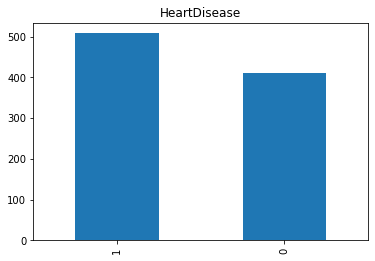

In [26]:
# use a bar plot to show the distribution of "HeartDisease"
disease['HeartDisease'].value_counts().plot.bar(title = "HeartDisease")

- As shown in the above bar chart, we know that there are two values here which '1' represents the people with heartdisease and '0' means not.
- There are nearly 900 people in the dataset, and about 500 people have heart diseases, 400 people are not.

Because we have done the standardization towards numerical data, thus we need to do the Re-EDA to show the distribution of numerical data.

In [27]:
df_num1.head()

,Age,RestingBP,MaxHR,Cholesterol,Oldpeak
0,-1.433140,0.410909,1.382928,0.825070,-0.832432
1,-0.478484,1.491752,0.754157,-0.171961,0.105664
2,-1.751359,-0.129513,-1.525138,0.770188,-0.832432
3,-0.584556,0.302825,-1.132156,0.139040,0.574711
4,0.051881,0.951331,-0.581981,-0.034755,-0.832432


In [28]:
column_num1=df_num1.columns.to_list()

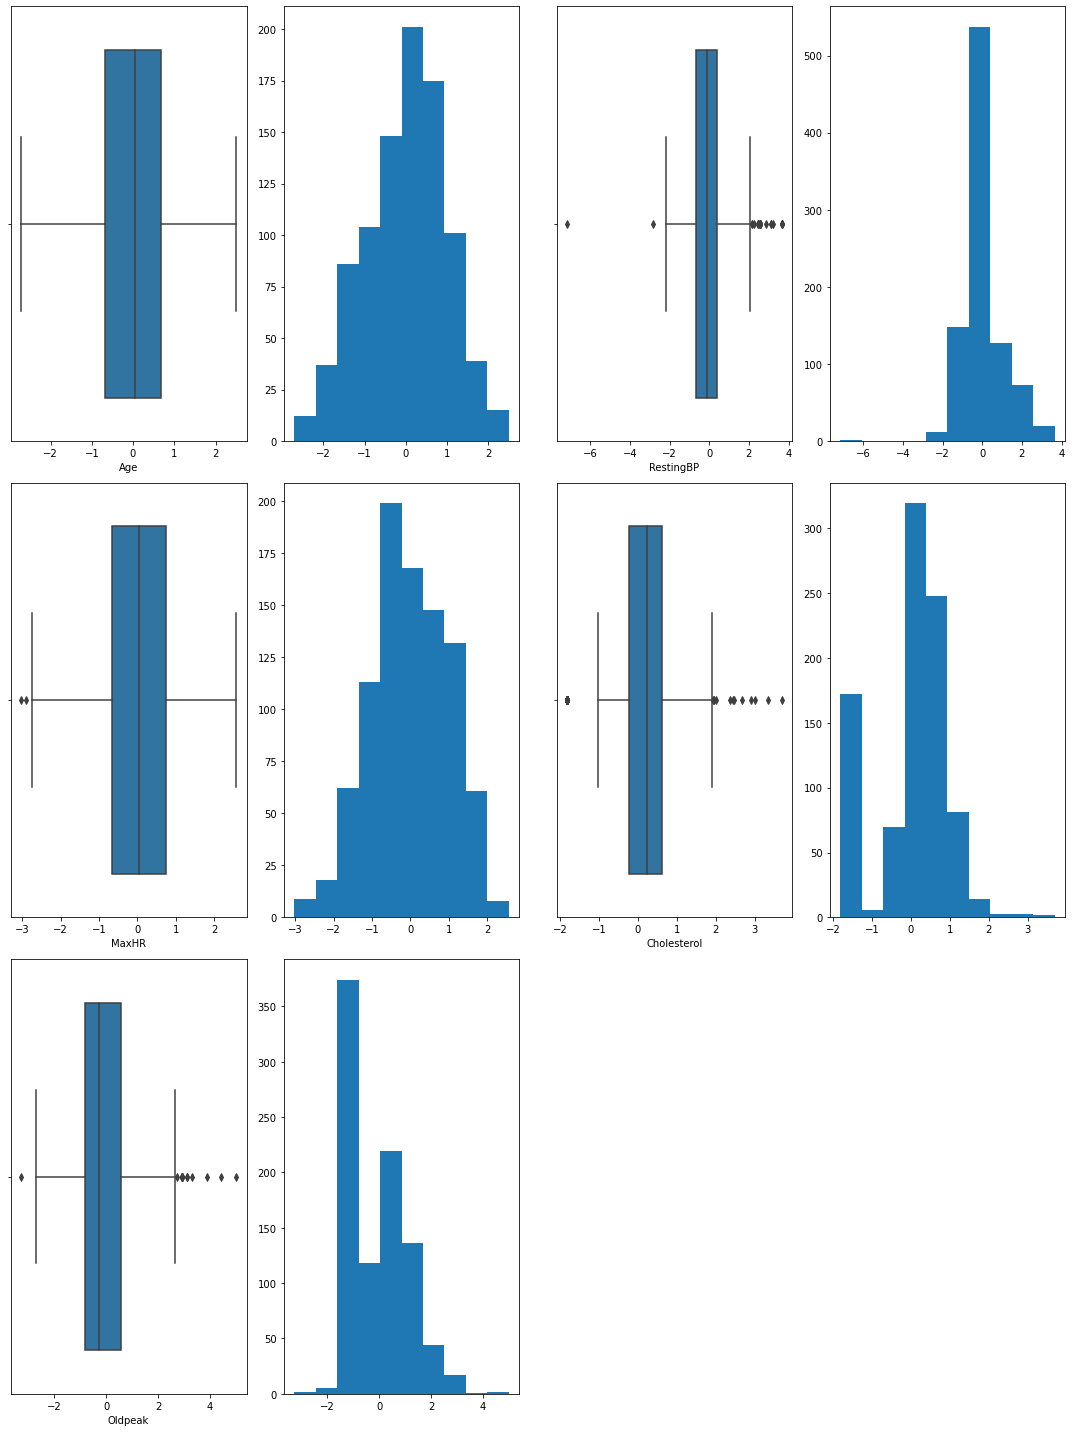

In [29]:
# show hist plots and boxplots of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(5):
    n=2*i
    plt.subplot(3,4,n+1)
    sns.boxplot(df_num1[column_num1[i]])
    plt.subplot(3,4,n+2)
    plt.hist(df_num1[column_num1[i]])
    
plt.tight_layout()

As shown in the above boxplots and histograms, we found that the value of each attribute has been standardized, the mean value is nearly about 0 and the magnitude is already the same, which can reduce errors and impacts caused by inconsistencies of magnitude.

## Machine Learning Models

### Feature Selection

In [30]:
# Select categorical features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = disease.iloc[:,5:18]
y = disease.iloc[:,-1]
print("Features Name: ", X.shape)
print("----")
select = SelectKBest(score_func=chi2, k=10)
fit = select.fit(X,y)
# type(fit)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 
# Print 10 best features
print(featureScores.nlargest(10,'Score'))

Features Name:  (918, 13)
----
          Features       Score
11              Up  202.447182
10            Flat  140.635329
12  ExerciseAngina  133.640134
3              ATA  120.349494
2              ASY  112.672269
0                F   67.640033
4              NAP   32.427756
1                M   18.006243
9             Down   12.835932
8               ST    7.778755


From above, we can see that the scores of 'Up', 'Flat', 'ExerciseAngina', 'ATA', 'ASY' are higher than other attributes, so we will use them to model.

In [31]:
# Select numerical features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
X = disease.iloc[:,:5]
y = disease.iloc[:,-1]
print("Features Name: ", X.shape)
print("----")
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# Naming the dataframe columns
featureScores.columns = ['Features','Score'] 
# Print 5 best features
print(featureScores.nlargest(5,'Score'))

Features Name:  (918, 5)
----
      Features       Score
4      Oldpeak  178.615120
2        MaxHR  174.913585
0          Age   79.160779
3  Cholesterol   52.459725
1    RestingBP   10.727228


From above, we can see that the scores of 'Oldpeak', 'MaxHR', 'Age' are higher than other attributes, so we will use them to model.

In [32]:
# use high score variables as our explanatory variables to model
X = disease[['Up','Flat','ExerciseAngina','ATA','ASY','Oldpeak','MaxHR','Age']]

In [33]:
y = disease.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

We need to calculate the null_value_rate before performing model work.

In [35]:
data_null=data.loc[X_train.index]
pd.value_counts(data_null['HeartDisease'])

1    356
0    286
Name: HeartDisease, dtype: int64

In [36]:
print('Null_value_rate is:',356/len(X_train))

Null_value_rate is: 0.5545171339563862


**LogisticRegression**

We are going to choose 'penalty', 'solver', 'C' and 'max_iter' as our parameters to be tuned.

In [37]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters1={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"],
      "solver":["newton-cg","lbfgs","liblinear","sag","saga"],
      'max_iter': [20, 50, 100, 200, 500, 1000]}
clf1=LogisticRegression()
GS1=GridSearchCV(clf1,parameters1,cv=10)
GS1.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",GS1.best_params_)
print("accuracy :",GS1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.848798076923077


According to the above result of Gridsearch we will use 'C':0.1, 'penalty':'l2', and 'solver':'newton-cg' in our model1. 
And other parameters like 
- Multi-class, we set its value as defaut:'auto', it can choose true solver according to the situation that if the data is binary.
- Dual formulation is only implemented for l2 penalty with liblinear solver. So we used none which is defaut value.
- The tol is tolerance for stopping criteria.The tol parameter tells the optimization algorithm when to stop. If the value of tol is too big, the algorithm stops before it can converge. Too big tol value will cause feature coefficients highly fluctuate  Thus here we are going to choose default=1e-4 which is enough for us to train model.

In [38]:
model1 = LogisticRegression(C=0.1,penalty="l2",solver="newton-cg",random_state=12)
model1.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=12, solver='newton-cg')

In [39]:
model1.score(X_train,y_train)

0.8520249221183801

**Decision Tree**

We are going to choose 'splitter', 'criterion', 'min_samples_leaf' and 'max_depth' as our parameters to be tuned.

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
}

clf = DecisionTreeClassifier(random_state=12)
GS = GridSearchCV(clf, parameters, cv=10) 
GS.fit(X_train,y_train)
GS.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'splitter': 'random'}

According to the above result of Gridsearch we will use 'criterion':'gini', 'max_depth':'8', 'min_samples_split':'2', 'min_samples_leaf':'6' in our model2. And other parameters like
- max_feature is a pruning parameter used to limit the overfitting of high-dimensional data, without knowing the importance of each feature in the decision tree, forcibly setting this parameter may lead to insufficient model learning, thus we are going to set its value as default: none
- class_weight is uesd to complete the parameters of the sample label balance. According to our EDA work and data Review, we find that there are no obvious unbalacne in data. So we are going to set its value as defaut: None

In [42]:
model2 = DecisionTreeClassifier( random_state=12, criterion='gini',max_depth=8,min_samples_leaf=6,splitter='random')
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, random_state=12,
                       splitter='random')

In [43]:
model2.score(X_train,y_train)

0.8535825545171339

**XG Boost**

We are going to choose 'n_estimators', 'subsample', 'learning_rate' as our parameters to be tuned.

In [44]:
from xgboost import XGBClassifier as XGBC

In [45]:
# Time waring: 14.2min
import numpy as np
param_grid = {"n_estimators": np.linspace(100, 1000, 10, dtype=int),
             "subsample": np.linspace(0, 1, 11),
             "learning_rate": np.logspace(-2, 0, 10)}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(XGBC(random_state=12),param_grid,cv=5,n_jobs=-1,verbose=2) 
grid_search.fit(X_train,y_train) 
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 'subsample': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'learning_rate': array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])}
Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 5500 out of 5500 | elapsed: 16.4min finished


[16:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test set score:0.85
Best parameters:{'learning_rate': 0.046415888336127774, 'n_estimators': 100, 'subsample': 0.1}
Best score on train set:0.85


According to the above result of Gridsearch we will use 'learning rate': 0.046415888336127774, 'n_estimators': 100, 'subsample': 0.1 in our model3. And other parameters like
- max_depth is a pruning parameter used to limit the overfitting of high-dimensional data. the maximum depth of the tree, the larger the value, the easier it is to overfit, because the 'learning rate' is also a pruning parameter, and we have made adjustmentsthus for it, so we are going to set its value as default: 6.

In [46]:
model3 = XGBC(n_estimators=100, learning_rate=0.046415888336127774, subsample = 0.1, random_state=12)
model3.fit(X_train, y_train)

[16:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.046415888336127774,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Model Selection

We will use cross-validation to calculate the accuracy, precision, recall, f1 of each model and then compare them.

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
accuracy1 = cross_val_score(model1,X_train,y_train,cv=5).mean()
accuracy1

0.8441375968992247

In [49]:
accuracy2 = cross_val_score(model2,X_train,y_train,cv=5).mean()
accuracy2

0.8254966085271317

In [50]:
accuracy3 = cross_val_score(model3,X_train,y_train,cv=5).mean()
accuracy3

[16:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8472989341085271

In [51]:
precision1 = cross_val_score(model1,X_train,y_train,cv=5,scoring='precision').mean()
precision1

0.8496255891729387

In [52]:
precision2 = cross_val_score(model2,X_train,y_train,cv=5,scoring='precision').mean()
precision2

0.8349201416223767

In [53]:
precision3 = cross_val_score(model3,X_train,y_train,cv=5,scoring='precision').mean()
precision3

[16:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8456330016185365

In [54]:
recall1 = cross_val_score(model1,X_train,y_train,cv=5,scoring='recall').mean()
recall1

0.8735133020344288

In [55]:
recall2 = cross_val_score(model2,X_train,y_train,cv=5,scoring='recall').mean()
recall2

0.8566901408450704

In [56]:
recall3 = cross_val_score(model3,X_train,y_train,cv=5,scoring='recall').mean()
recall3

[16:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8875978090766823

In [57]:
f11 = cross_val_score(model1,X_train,y_train,cv=5,scoring='f1').mean()
f11

0.86114310984174

In [58]:
f12 = cross_val_score(model2,X_train,y_train,cv=5,scoring='f1').mean()
f12

0.8448755238284976

In [59]:
f13 = cross_val_score(model3,X_train,y_train,cv=5,scoring='f1').mean()
f13

[16:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8652721854138964

| Metric        | Model1 | Model2 | Model3 
| ------------- | ------- | -------      |------    
| # Indep. Vars |  8     |   8      |   8          
| Accuracy     | 0.8441  | 0.8254     | 0.8472  
| Precision    | 0.8496   | 0.8349    | 0.8456   
| Recall      | 0.8735   | 0.8566    | 0.8875   
| F1 Score     | 0.8611  | 0.8448     | 0.8652 

We select model3(XGBoost) as our preferred model.

Reasons:
We can see at a glance that among the 3 models, the XGBoost model's scores rank the highest among other models. XGBoost is an ensemble tree method that applies the principle of boosting weak learners using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements. Therefore, it is reasonable that the XGBoost model's score is higher than others.

In [60]:
# predict class labels for the test set
predicted3 = model3.predict(X_test)
predicted3

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix.

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predicted3))
print(classification_report(y_test, predicted3))

[[106  18]
 [ 24 128]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       124
           1       0.88      0.84      0.86       152

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



The testing score(accuracy) of model 3 is over 0.85, better than the train set score(accuract) of 0.84. The preferred model performs as well as we expected.

## Ensemble model

We are going to build an ensemble model comprised of four models:
- LogisticRegression model
- Decision Tree model
- KNN classifier model
- SVM classifier model

Because we have tunned the hyperparameters about LogisticRegresion model and Decision Tree Model, thus we are going to do GridSearch towards KNN and SVM in this step.

**KNN**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

We are going to choose 'weights', 'n_neighbors', 'p' as our parameters to be tuned.

In [63]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


Test set score:0.85
Best parameters:{'n_neighbors': 9, 'weights': 'uniform'}
Best score on train set:0.83


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


According to the above result of Gridsearch we will use 'n_neighbors': 9, 'weights': 'uniform' in our KNN model.

In [64]:
knn_clf = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

**SVM**

In [65]:
from sklearn.svm import SVC

We are going to choose 'kernel', 'gamma', 'C' as our parameters to be tuned.

In [66]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(SVC(random_state=12), param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.1s remaining:    0.0s


Test set score:0.82
Best parameters:{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best score on train set:0.83


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.8s finished


According to the above result of Gridsearch we will use 'C': 10, 'gamma': 0.001, 'kernel': 'rbf' in our SVM model.

In [67]:
svm_clf = SVC(C=10, gamma=0.001, kernel = 'rbf', random_state=12,probability=True)
svm_clf.fit(X_train, y_train)

SVC(C=10, gamma=0.001, probability=True, random_state=12)

### Voting Classifier

**Soft Voting**

In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

We need to set up list to store four models which we have already tuned the hyperparameters. and then evaluate each base model, fit model, get each score. we are going to use score as their weight. After fitting the train data by the essemble model, we can get the score of this model.

In [68]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

models = list()
models.append(('lr', model1))
models.append(('cart', model2))
models.append(('knn',knn_clf))
models.append(('svm',svm_clf))

 
# evaluate each base model
def evaluate_models(models, X_train, X_test, y_train, y_test):
# fit and evaluate the models
    scores = list()
    for name, model in models:
        # fit the model
        model.fit(X_train, y_train)
        # evaluate the model
        yhat = model.predict(X_test)
        acc = accuracy_score(y_test, yhat)
# store the performance
        scores.append(acc)
# report model performance
    return scores
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=12)
# fit and evaluate each model
scores = evaluate_models(models, X_train2, X_val, y_train2, y_val)
# create the ensemble
ensemble1 = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble1.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, random_state=12,
                                                 solver='newton-cg')),
                             ('cart',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=6,
                                                     random_state=12,
                                                     splitter='random')),
                             ('knn', KNeighborsClassifier(n_neighbors=9)),
                             ('svm',
                              SVC(C=10, gamma=0.001, probability=True,
                                  random_state=12))],
                 voting='soft',
                 weights=[0.8255451713395638, 0.8161993769470405,
                          0.8255451713395638, 0.8161993769470405])

**Hard Voting**

Hard voting means that every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.

Similarly we set up a list to store four models and use votingclassifier model with hard voting to train data.

In [69]:
from sklearn.model_selection import cross_val_score
ensemble2 = VotingClassifier(estimators=models,voting='hard')
# fit the ensemble on the training dataset
ensemble2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, random_state=12,
                                                 solver='newton-cg')),
                             ('cart',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=6,
                                                     random_state=12,
                                                     splitter='random')),
                             ('knn', KNeighborsClassifier(n_neighbors=9)),
                             ('svm',
                              SVC(C=10, gamma=0.001, probability=True,
                                  random_state=12))])

**Model Comparison**

In [70]:
accuracy_knn = cross_val_score(knn_clf,X_train,y_train,cv=5).mean()
accuracy_knn

0.8286216085271316

In [71]:
accuracy_svm = cross_val_score(svm_clf,X_train,y_train,cv=5).mean()
accuracy_svm

0.834798934108527

In [72]:
accuracy_e1 = cross_val_score(ensemble1,X_train,y_train,cv=5).mean()
accuracy_e1

0.8410247093023255

In [73]:
accuracy_e2 = cross_val_score(ensemble2,X_train,y_train,cv=5).mean()
accuracy_e2

0.8347868217054263

In [74]:
precision_knn = cross_val_score(knn_clf,X_train,y_train,cv=5,scoring='precision').mean()
precision_knn

0.8258319441136779

In [75]:
precision_svm = cross_val_score(svm_clf,X_train,y_train,cv=5,scoring='precision').mean()
precision_svm

0.8356399743396647

In [76]:
precision_e1 = cross_val_score(ensemble1,X_train,y_train,cv=5,scoring='precision').mean()
precision_e1

0.8377940156237212

In [77]:
precision_e2 = cross_val_score(ensemble2,X_train,y_train,cv=5,scoring='precision').mean()
precision_e2

0.8477379840055898

In [78]:
recall_knn = cross_val_score(knn_clf,X_train,y_train,cv=5,scoring='recall').mean()
recall_knn

0.8763693270735524

In [79]:
recall_svm = cross_val_score(svm_clf,X_train,y_train,cv=5,scoring='recall').mean()
recall_svm

0.8735133020344288

In [80]:
recall_e1 = cross_val_score(ensemble1,X_train,y_train,cv=5,scoring='recall').mean()
recall_e1

0.8847417840375587

In [81]:
recall_e2 = cross_val_score(ensemble2,X_train,y_train,cv=5,scoring='recall').mean()
recall_e2

0.8566901408450704

In [82]:
f1_knn = cross_val_score(knn_clf,X_train,y_train,cv=5,scoring='f1').mean()
f1_knn

0.8497077114861886

In [83]:
f1_svm = cross_val_score(svm_clf,X_train,y_train,cv=5,scoring='f1').mean()
f1_svm

0.8537113887862985

In [84]:
f1_e1 = cross_val_score(ensemble1,X_train,y_train,cv=5,scoring='f1').mean()
f1_e1

0.8599192433383104

In [85]:
f1_e2 = cross_val_score(ensemble2,X_train,y_train,cv=5,scoring='f1').mean()
f1_e2

0.851650780664422

| Metric |Model1(LogisticRegression) |Model2(DecisionTree) |KNN Model |SVM Model |Ensemble Soft |Ensemble Hard |Model3(XGBoost)
| ------------- | -------        | -------         | ----------| ----    | ----        | ----        |----  
| # Indep. Vars |  8           |   8           | 8       | 8     | 8         | 8           | 8          
| Accuracy     | 0.8441        | 0.8254          | 0.8286    | 0.8347  | 0.8410      | 0.8347       | 0.8472  
| Precision    | 0.8496        | 0.8349          | 0.8258    | 0.8356   | 0.8377     | 0.8477        | 0.8456   
| Recall      | 0.8735        | 0.8566          | 0.8763    | 0.8735   | 0.8847       | 0.8566      | 0.8875   
| F1 Score     | 0.8611       | 0.8448          | 0.8497    | 0.8537   | 0.8599       | 0.8516      | 0.8652 

From above, we can see that the scores of the ensemble model are better than Model2(DecisionTree), KNN Model and SVM Mode, but not as good as Model1(LogisticRegression), which is not in line with our expectations. We speculate that it may be because the data set is too small or the individual models' parameters need to be further adjusted then ensembled.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix.

In [86]:
# predict class labels for the test set
predicted1 = model3.predict(X_test)
predicted1

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predicted1))
print(classification_report(y_test, predicted1))

[[106  18]
 [ 24 128]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       124
           1       0.88      0.84      0.86       152

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



The testing score(accuracy) of model 3 is over 0.85, better than the train set score(accuract) of 0.84. The preferred model performs as well as we expected.

## Conclusion

After the feature selection and model evaluation, we can try to answer our research questions. We used chi2 and f_regression to select the best attributes that can help us to construct machine learning models to predict whether people have cardiovascular disease or not. The chosen attributes are 'Up(ST_Slope)', 'Flat(ST_Slope)', 'ExerciseAngina', 'ATA(ChestPainType)', 'ASY(ChestPainType)', 'Oldpeak','MaxHR' and 'Age'. The best model to predict whether people have cardiovascular or not is XGBoost, because the XG Boost has the highest accuracy, precision, recall, and F1 Score. 

And our first challenge in this project is to use grid search for XGBoost, it spent us a lot of time to run it, at last, we decreased the parameters that we adjusted. The next challenge is to find out all parameters about models and decide if we need to use default values or values after tuning, then we learn the meaning of each hyperparameter, and decide which one is important in this model and solve this challenge. The final challenge for us is that the effect of the ensemble model is not very different from the single model, that might be caused by the small dataset and the performance of the 'weak learner' is so good that we can not improve accuracy and other selection criteria through this model.

As for the potential future extension, we thought there are not only 1000 patients who got cardiovascular in the world, so if the dataset is larger, there will be more outliers and missing values, which will increase the difficulty of our modeling and tuning. We need to consider more about people's physical indicators. Also improve our model for better use and precision, which can help people detect whether they have a problem with their heart.

## Reference

1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression
2. https://scikit-learn.org/stable/modules/ensemble.html
3. https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
4. https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
5. https://www.oreilly.com/library/view/machine-learning-for/9781783980284/47c32d8b-7b01-4696-8043-3f8472e3a447.xhtml
6. https://www.kaggle.com/enespolat/grid-search-with-logistic-regression/notebook
7. https://www.codegrepper.com/code-examples/python/cross_val_score+scoring+options
8. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
9. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
11. https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/